# Data Prep

### Use this notebook for preparing image data for modeling.  
### Please keep this notebook tidy, move functions to utils.py and add lots of comments

In [1]:
%matplotlib inline
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from datetime import datetime
from IPython.core.display import display, HTML
import cv2
from PIL import Image
from pathlib import Path

# repeatable functions housed in the utils file and imported here
from utils import *

In [2]:
## prepare dataset to add map to the location of the image file.  
## This format will be used in the DataLoader class that we can build to pass data to the model

df= pd.read_csv("annotations.csv")
df['filename']= "./images/" + df['filename']
df.to_csv('annotations_map.csv', index= False)
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,./images/1.jpg,2048,1251,waldo,706,513,743,562
1,./images/10.jpg,1600,980,waldo,715,157,733,181
2,./images/11.jpg,2828,1828,waldo,460,1530,482,1557
3,./images/12.jpg,1276,1754,waldo,846,517,878,563
4,./images/13.jpg,1280,864,waldo,932,274,942,288


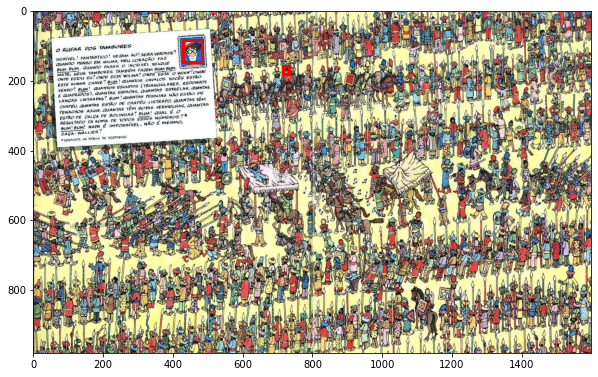

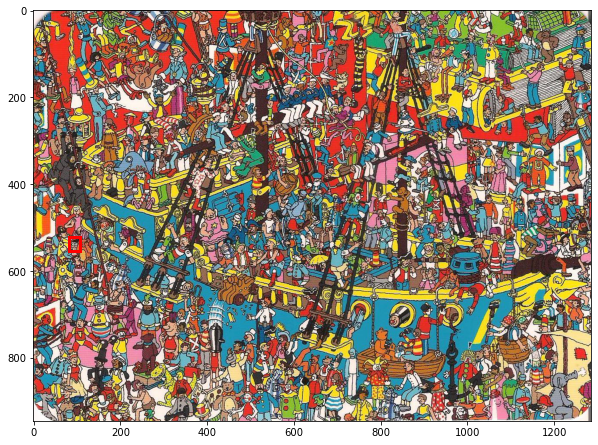

In [3]:
## print some images for funzies
print_image("10", figsize= (10,10))
print_image("2", figsize= (10,10))

In [4]:
#Populating Training DF with new paths and bounding boxes
new_paths = []
new_bbs = []
train_path_resized = Path('./images_resized/')
for index, row in df.iterrows():
    new_path,new_bb = resize_image_bb(row['filename'], train_path_resized, create_bb_array(row.values),500)
    new_paths.append(new_path)
    new_bbs.append(new_bb)
    
df['new_path'] = new_paths
df['new_bb'] = new_bbs
df.head()

,filename,width,height,class,xmin,ymin,xmax,ymax,new_path,new_bb
0,./images/1.jpg,2048,1251,waldo,706,513,743,562,images_resized/1.jpg,"[172, 205, 181, 225]"
1,./images/10.jpg,1600,980,waldo,715,157,733,181,images_resized/10.jpg,"[223, 80, 229, 92]"
2,./images/11.jpg,2828,1828,waldo,460,1530,482,1557,images_resized/11.jpg,"[81, 418, 85, 426]"
3,./images/12.jpg,1276,1754,waldo,846,517,878,563,images_resized/12.jpg,"[332, 147, 344, 160]"
4,./images/13.jpg,1280,864,waldo,932,274,942,288,images_resized/13.jpg,"[364, 159, 368, 167]"


In [5]:
## Create New DF with only the new path and new bb

## New DF is df_traiin

resized_df_rows= []
for index, row in df.iterrows():
    img_size= cv2.imread(row['new_path']).shape
    row_bb= row['new_bb']
    resized_df_rows.append([row['new_path'], img_size[1], img_size[0],row['class'], row_bb[0], row_bb[1], row_bb[2], row_bb[3]])
df_train= pd.DataFrame(resized_df_rows)
df_train.columns= ['filename','width','height','class','xmin','ymin','xmax','ymax']
df_train.to_csv('annotations_map_resized.csv', index=False)
df_train.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
0,images_resized/1.jpg,500,500,waldo,172,205,181,225
1,images_resized/10.jpg,500,500,waldo,223,80,229,92
2,images_resized/11.jpg,500,500,waldo,81,418,85,426
3,images_resized/12.jpg,500,500,waldo,332,147,344,160
4,images_resized/13.jpg,500,500,waldo,364,159,368,167


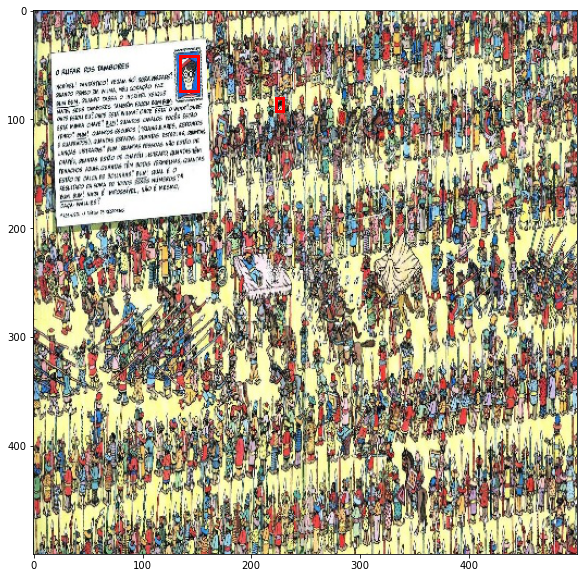

In [9]:
## PRINT A RESIZED IMAGE
print_image('10', annotations_path='annotations_map_resized.csv', images_path='./images_resized/')